##어제 오른 내 주식, 과연 내일은?

데이터셋
<br/>Samsung Electronics Stock Price : Close, High

개발 환경
<br/>데이터 정보
<br/>데이터 탐색
<br/>데이터 전처리


시계열 안정성 분석
<br/>정성적 그래프 분석
<br/>Augmented Dicky-Fuller Test
<br/>추세 상쇄
<br/>시계열 분해
<br/>Residual 안정성 확인

데이터 분리

모델 구성
<br/>ACF. PACF
<br/>차분 안정성 확인

모델 학습
<br/>모델 평가
<br/>결론
<br/>참고문헌

#개발 환경

In [ ]:
!pip install statsmodels 

statsmodels은 ARIMA 모델을 제공한다.

In [ ]:
!pip install -U scikit-learn

/usr/local/lib64/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

Augmented Dicky-Fuller Test에서 발생하는 FutureWarning을 해결하기 위해 scikit-learn을 업데이트한다.

In [ ]:
import os
import math

In [ ]:
import pandas as pd                                   
import numpy as np                                       
import matplotlib.pyplot as plt   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip freeze > '/content/drive/MyDrive/lms/library_version.txt'

In [ ]:
library_name = ['pandas=', 'numpy=', 'matplotlib=', 'sklearn=', 'statsmodels=']
library_version = []
count = 0

import sys
print(sys.version)
print()

with open('/content/drive/MyDrive/lms/library_version.txt', 'r') as f:
    lines = f.read().splitlines() 

for i in range(len(lines)):
  for line in lines[i:i+1]:
    for library in library_name:
      if library in line:
        library_version.append(line)
        count += 1
        print(line, end = '    ')
        if count % 3 == 0:
          print()

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]

matplotlib==3.2.2      numpy==1.21.6      pandas==1.3.5     
sklearn==0.0      sklearn-pandas==1.8.0      statsmodels==0.10.2     


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Google Colab에서 할당된 GPU를 확인한다.
<br/>고용량 메모리 VM에 액세스한다.

#Samsung Electronics

##데이터 정보

[Yahoo Finance : Samsung Electronics Co., Ltd. (005930.KS) <br/> May 01, 2021 - May 01, 2022](https://finance.yahoo.com/quote/005930.KS/history?p=005930.KS)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/lms/005930.KS.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-03,81000.0,82400.0,81000.0,81700.0,80176.656250,15710336
2021-05-04,81900.0,82600.0,81800.0,82600.0,81059.875000,12532550
2021-05-06,81700.0,82300.0,81700.0,82300.0,80765.468750,17047511
2021-05-07,81800.0,82100.0,81500.0,81900.0,80372.937500,14154882
2021-05-10,82300.0,83500.0,81800.0,83200.0,81648.695313,19385027


2021년 5월 1일부터 2022년 5월 1일까지
<br/>날짜별로 시작가(Open), 최고가(High), 최저가(Low), 종가(Close), 수정종가(Adj Close), 거래량(Volume)이 저장되어 있다.

#Samsung Electronics_Close

##데이터 탐색

In [ ]:
ts = df['Close']
ts.head()

Date
2021-05-03    81700.0
2021-05-04    82600.0
2021-05-06    82300.0
2021-05-07    81900.0
2021-05-10    83200.0
Name: Close, dtype: float64

데이터프레임 컬럼 중에서 종가(Close)만 사용한다.
<br/>time series 의 이니셜을 따서 'ts'라고 이름붙인다

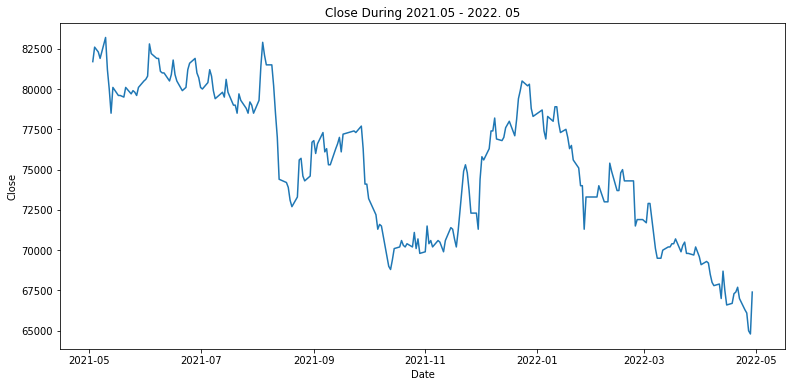

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6   

plt.plot(ts)
plt.title('Close During 2021.05 - 2022. 05')    
plt.xlabel("Date")                              
plt.ylabel("Close")                              
plt.show()                                       

종가(close)에 대한 시계열(time series) 데이터를 차트를 그린다.

##데이터 전처리

In [ ]:
ts = ts.interpolate(method='time')
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

interpolate 메서드를 이용해 결측치가 있다면 보간한다. 
<br/>보간 기준은 time이다.
<br/>보간 이후 결측치(NaN) 유무를 다시 확인한다.

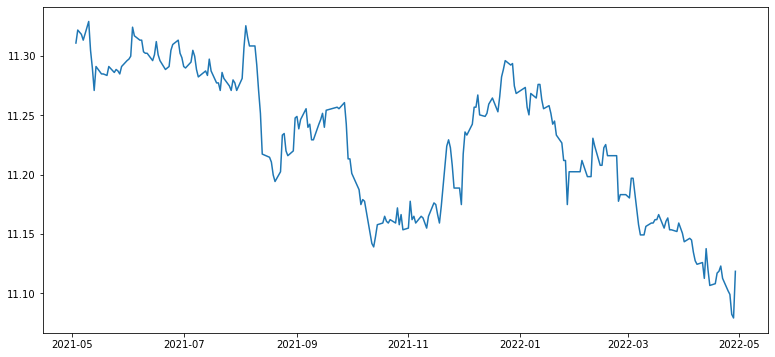

In [ ]:
ts_log = np.log(ts)
plt.plot(ts_log)
plt.show()

로그 변환을 통해 시간 추이에 따른 분산을 일정하게 한다.

## 시계열 안정성 분석

### 정성적 그래프 분석

In [ ]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  
    rolstd = timeseries.rolling(window=window).std()    

    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

원본시계열, 이동평균, 이동표준편차 plot으로 시각화한다.

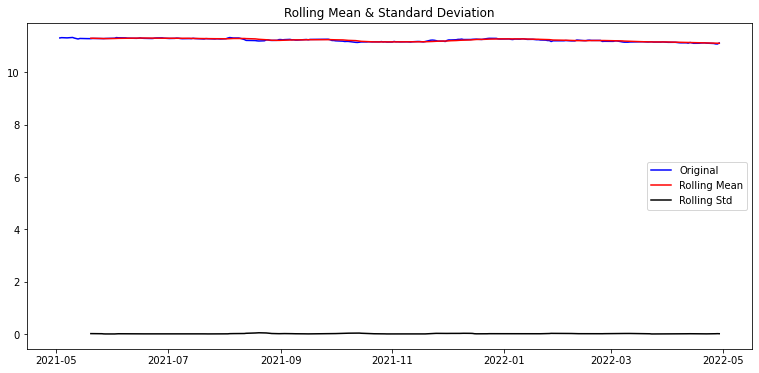

In [ ]:
plot_rolling_statistics(ts_log)

원본시계열, 이동평균과 이동표준편차의 간격이 넓어 그래프를 통해 시간 추이를 확인할 수 없다.
<br/>따라서 원본시계열, 이동평균 그래프와 이동표준편차 그래프를 나눈다.

In [ ]:
def plot_rolling_statistics_origmean(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  
    rolstd = timeseries.rolling(window=window).std()  

    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean Deviation')
    plt.show(block=False)

원본시계열, 이동평균을 plot으로 시각화한다.

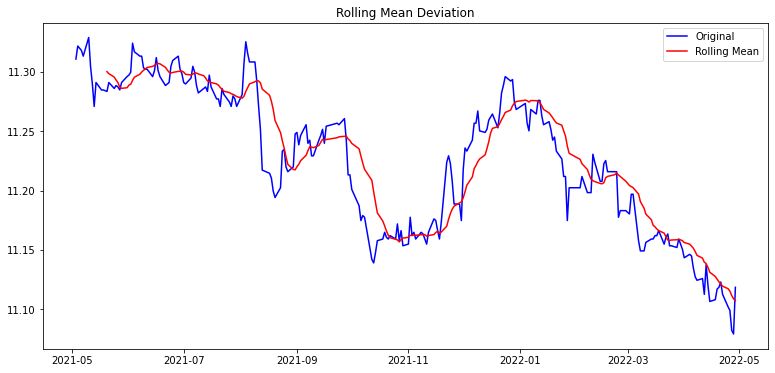

In [ ]:
plot_rolling_statistics_origmean(ts_log)

시간 추이에 따라 종가(close)의 평균은 낮아진다.

In [ ]:
def plot_rolling_statistics_std(timeseries, window=12):
    
    rolstd = timeseries.rolling(window=window).std()    

    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Standard Deviation')
    plt.show(block=False)

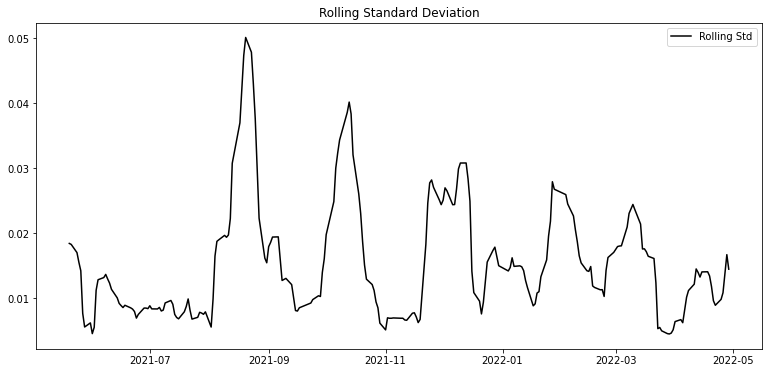

In [ ]:
plot_rolling_statistics_std(ts_log)

시간 추이에 따라 표준편차가 불규칙하다.

###Augmented Dicky-Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    
    dftest = adfuller(timeseries, autolag='AIC')  
    print('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

ADF Test라는 시계열 데이터의 안정성(stationary)을 시험하는 함수 모델을 설정한다.

In [ ]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.401034
p-value                          0.581780
#Lags Used                       0.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


ts_log_close(Samsung Electronics_Close) 시계열이 안정적이지 않다는 귀무가설을 검증한다.
<br/>p-value가 거의 0.5에 가깝게 나타난다.
<br/>귀무가설을 기각할 수 없기에 시계열이 안정적이라고 할 수 없다.

###추세 상쇄

p-value를 낮춰 시계열이 안정적이라는 대립가설을 받아들이기 위해 추세(Trend)를 상쇄한다. 

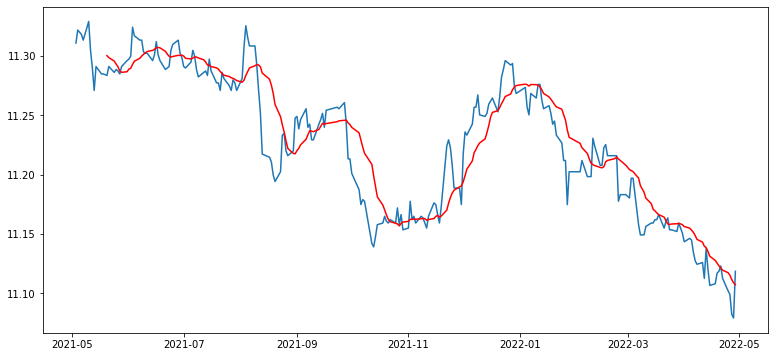

In [ ]:
close_moving_avg = ts_log.rolling(window=12).mean()   
plt.plot(ts_log)
plt.plot(close_moving_avg, color='red')
plt.show()

moving average 구하는 식을 통해 시간 추이에 따라 나타나는 평균값 변화를 추세(trend)를 구한다.

In [ ]:
ts_log_close_moving_avg = ts_log - close_moving_avg 
ts_log_close_moving_avg.dropna(inplace=True)
ts_log_close_moving_avg.head(15)

Date
2021-05-20   -0.016683
2021-05-21   -0.007516
2021-05-24   -0.009544
2021-05-25   -0.004572
2021-05-26   -0.003659
2021-05-27   -0.002483
2021-05-28    0.004916
2021-05-31    0.009378
2021-06-01    0.008419
2021-06-02    0.010173
2021-06-03    0.031339
2021-06-04    0.021388
2021-06-07    0.015253
2021-06-08    0.013401
2021-06-09    0.002134
Name: Close, dtype: float64

ts_log - close_moving_avg를 하여 변화량을 제거한다.

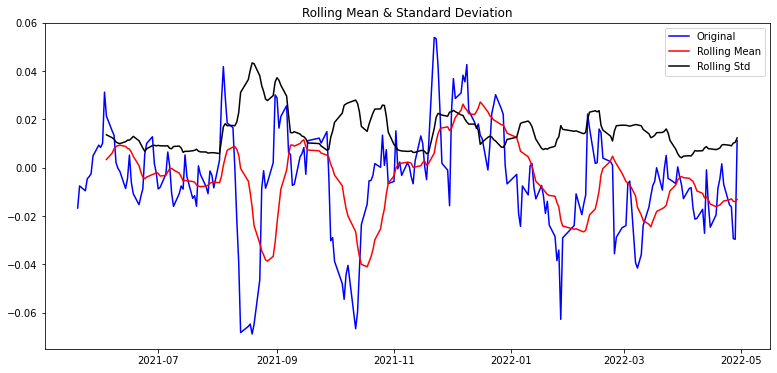

In [ ]:
plot_rolling_statistics(ts_log_close_moving_avg)

In [ ]:
augmented_dickey_fuller_test(ts_log_close_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -4.919732
p-value                          0.000032
#Lags Used                       1.000000
Number of Observations Used    232.000000
Critical Value (1%)             -3.458855
Critical Value (5%)             -2.874080
Critical Value (10%)            -2.573453
dtype: float64


p-value가 거의 0에 가깝게 나타난다.
<br/>귀무가설을 기각하여 시계열이 안정적이라고 할 수 있다.

###시계열 분해

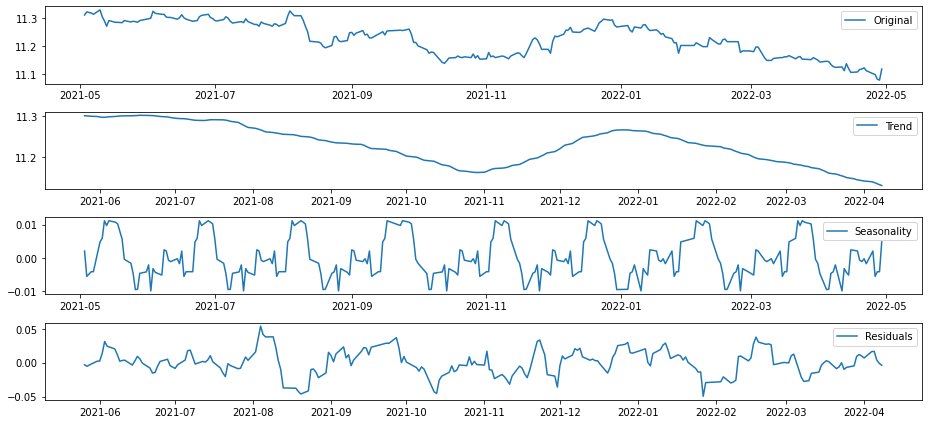

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
close_decomposition = seasonal_decompose(ts_log, freq=30) 

close_trend = close_decomposition.trend 
close_seasonal = close_decomposition.seasonal 
close_residual = close_decomposition.resid 


plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(close_trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(close_seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(close_residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

freq을 30일로 정하여 월별 데이터로 구성한다.
<br/>trend는 추세(시간 추이에 따라 나타나는 평균값 변화),
<br/>seasonality은 계절성(패턴이 파악되지 않은 주기적 변화)이다.

moving average 제거, differencing 등을 거치지 않고도 trend, seasonality으로 직접 분리한다.
<br/>Original 시계열에서 Trend와 Seasonality를 제거한 나머지를 Residual이라고 한다.

### Residual 안정성 확인

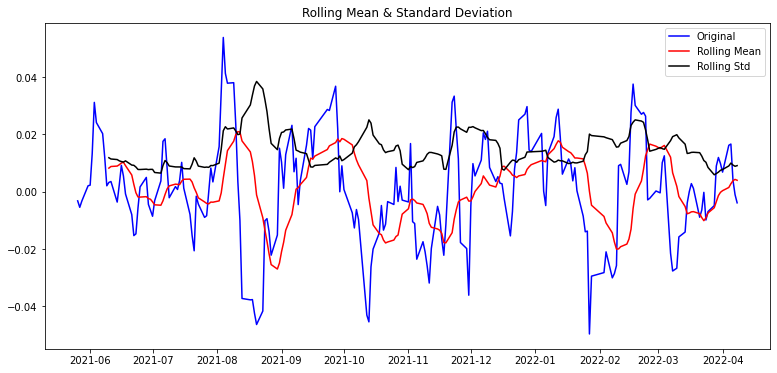

In [ ]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(close_residual)

In [ ]:
close_residual.dropna(inplace=True)
augmented_dickey_fuller_test(close_residual)

Results of Dickey-Fuller Test:
Test Statistic                  -5.520072
p-value                          0.000002
#Lags Used                       1.000000
Number of Observations Used    213.000000
Critical Value (1%)             -3.461429
Critical Value (5%)             -2.875207
Critical Value (10%)            -2.574054
dtype: float64


p-value가 거의 0에 가깝게 나타난다.
<br/>귀무가설을 기각하여 시계열이 안정적이라고 할 수 있다.

##데이터 분리

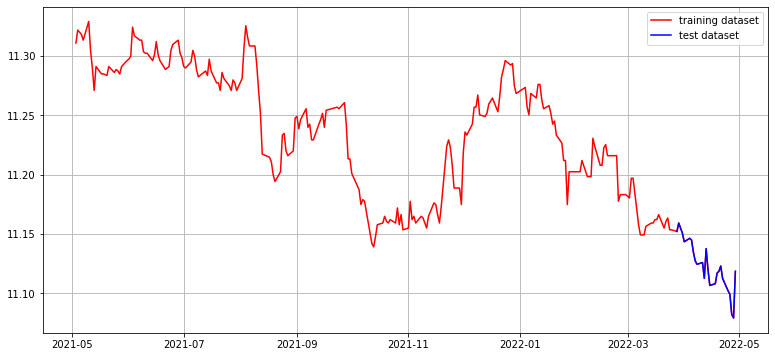

In [ ]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]

plt.figure(figsize=(13,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')
plt.plot(test_data, c='b', label='test dataset')
plt.legend()
plt.show()

과거 데이터를 기반으로 한 시계열 예측이기 때문에 데이터를 훈련 데이터와 시험 데이터로 분리한다.
<br/>train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택한다.

In [ ]:
print(train_data.shape)
print(test_data.shape)

(220,)
(25,)


##모델 구성

ARIMA를 이용하면 시계열 데이터 예측 모델을 자동으로 만들 수 있다.

###ACF. PACF

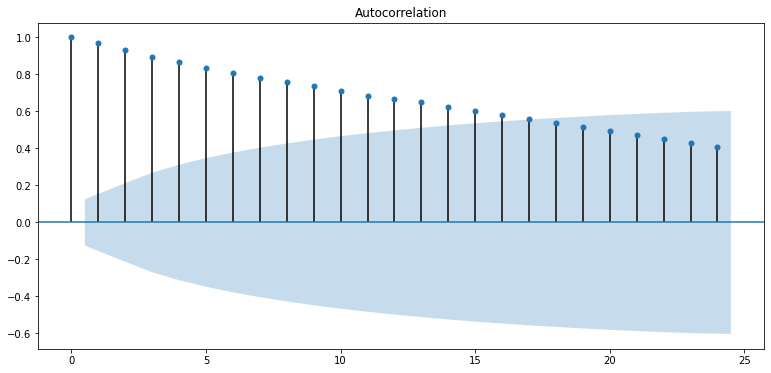

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)
plt.show()

ACF(Autocorrelation) 그래프를 볼 때
<br/>점차적으로 감소하는 추이를 보이고 있어 적합한 q값이 없어 보인다.

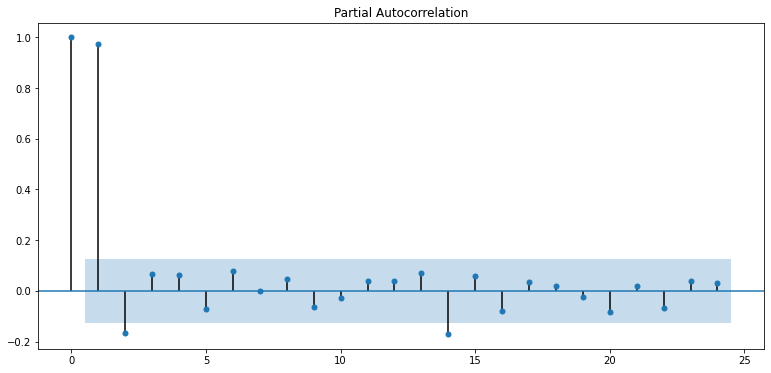

In [ ]:
plot_pacf(ts_log)  
plt.show()

PACF(Partial Autocorrelation) 그래프를 볼 때 p=0이 적합해 보인다.
<br/>p=1 이상인 구간에서 PACF가 0에 가까워지고 있기 때문이다.

###차분 안정성 확인

Results of Dickey-Fuller Test:
Test Statistic                -1.449849e+01
p-value                        5.986202e-27
#Lags Used                     0.000000e+00
Number of Observations Used    2.430000e+02
Critical Value (1%)           -3.457551e+00
Critical Value (5%)           -2.873509e+00
Critical Value (10%)          -2.573148e+00
dtype: float64



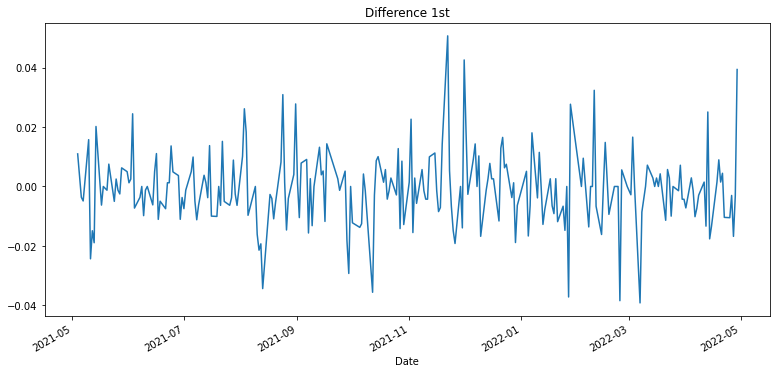

In [ ]:
close_diff_1 = ts_log.diff(periods=1).iloc[1:]
close_diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(close_diff_1)
print()

p-value가 0.5이하이므로 1차 차분한 시계열 데이터 값이 안정적이다.

Results of Dickey-Fuller Test:
Test Statistic                -7.401145e+00
p-value                        7.549515e-11
#Lags Used                     1.300000e+01
Number of Observations Used    2.290000e+02
Critical Value (1%)           -3.459233e+00
Critical Value (5%)           -2.874245e+00
Critical Value (10%)          -2.573541e+00
dtype: float64



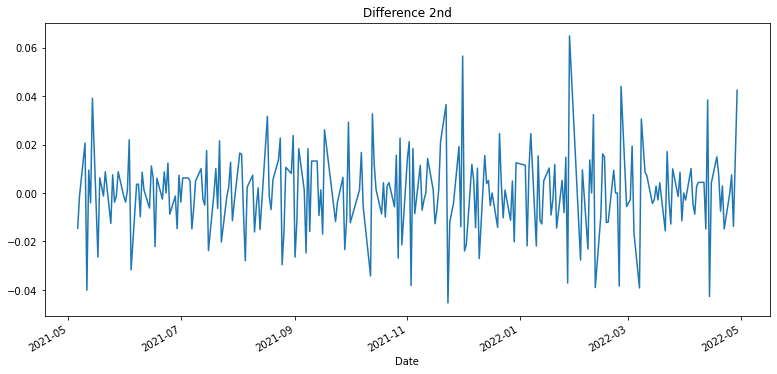

In [ ]:
close_diff_2 = close_diff_1.diff(periods=1).iloc[1:]
close_diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(close_diff_2)
print()

p-value가 0.5이하이므로 2차 차분한 시계열 데이터 값이 안정적이다.
<br/>1차 차분한 것이 데이터 손실이 더 적기 때문에 d=1이 적합하다.

##모델 학습

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_data, order=(0, 1, 0))  
fitted_m = model.fit(disp=-1)  

print(fitted_m.summary())
print()

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  219
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 649.710
Method:                           css   S.D. of innovations              0.012
Date:                Sun, 17 Jul 2022   AIC                          -1295.419
Time:                        04:58:15   BIC                          -1288.641
Sample:                             1   HQIC                         -1292.682
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.001     -0.854      0.394      -0.002       0.001



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<br/>



```
train_data.index = pd.DatetimeIndex(train_data.index).to_period('D')
```



ValueWarning을 해결하기 위해 데이터의 인덱스에 to_period('D')를 시도했으나 해결되지 않는다.

<br/>

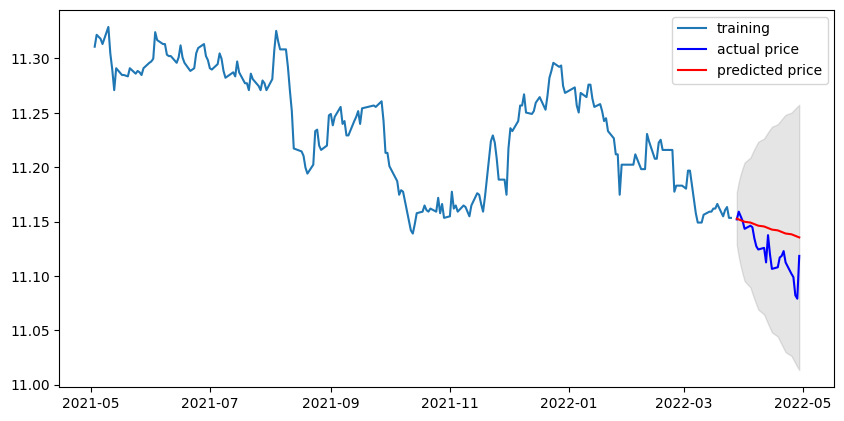

In [ ]:
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05) 

fc_series = pd.Series(fc, index=test_data.index)  
lower_series = pd.Series(conf[:, 0], index=test_data.index)   
upper_series = pd.Series(conf[:, 1], index=test_data.index) 

plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')

plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

forecast() 메소드를 이용해 시험 데이터를 예측한다.
<br/>alpha=0.05은 95% 신뢰구간을 설정한다.
<br/>fc_series은 예측 결과, lower_series는 예측결과의 하한, upper_series는 상한을 나타낸다.

##모델 평가

In [ ]:
import math

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE :', round(mape, 4))

MAPE : 0.0213


시계열 데이터를 로그 변환하여 사용했으므로 지수 변환한다.
<br/>np.exp()를 통해 전부 원본 스케일로 돌린 후 MAPE를 계산한다.

#Samsung Electronics_High

##데이터 탐색

In [ ]:
ts2 = df['High']

ts2.head()

Date
2021-05-03    82400.0
2021-05-04    82600.0
2021-05-06    82300.0
2021-05-07    82100.0
2021-05-10    83500.0
Name: High, dtype: float64

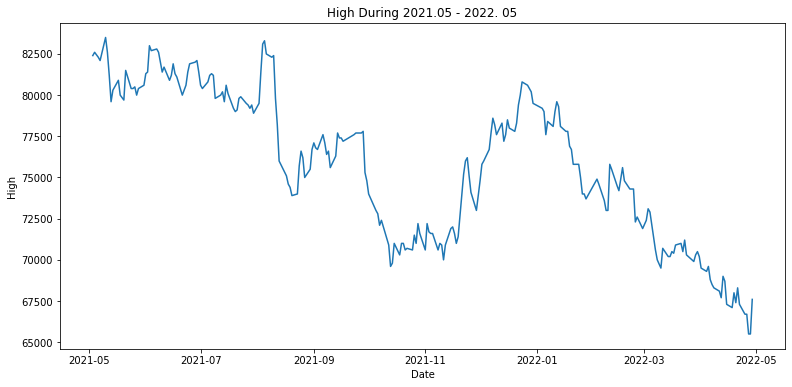

In [ ]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 13, 6    

plt.plot(ts2)
plt.title('High During 2021.05 - 2022. 05')     
plt.xlabel("Date")                               
plt.ylabel("High")                             
plt.show()                                      

최고가(High)에 대한 시계열(time series) 데이터를 차트로 그려본다

##데이터 전처리

In [ ]:
ts2=ts2.interpolate(method='time')
ts2[ts2.isna()]

Series([], Name: High, dtype: float64)

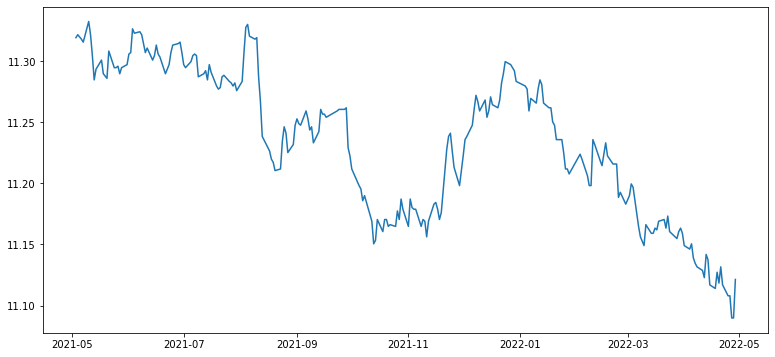

In [ ]:
ts2_log = np.log(ts2)
plt.plot(ts2_log)
plt.show()

## 시계열 안정성 분석

### 정성적 그래프 분석

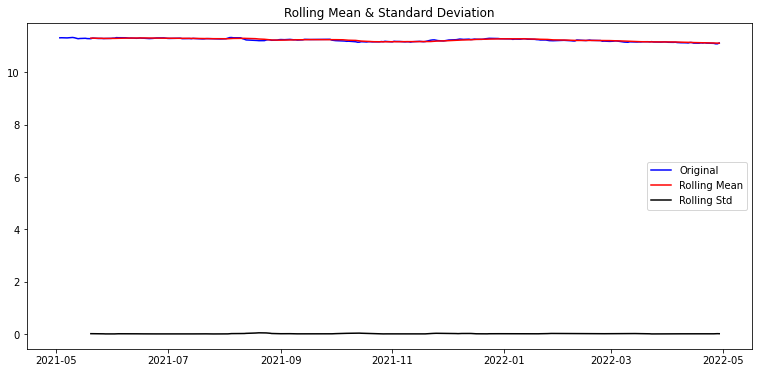

In [ ]:
plot_rolling_statistics(ts2_log)

원본시계열, 이동평균, 이동표준편차 plot으로 시각화한다.
<br/>원본시계열, 이동평균과 이동표준편차의 간격이 넓어 그래프를 통해 시간 추이를 확인할 수 없다.
<br/>따라서 원본시계열, 이동평균 그래프와 이동표준편차 그래프를 나눈다.

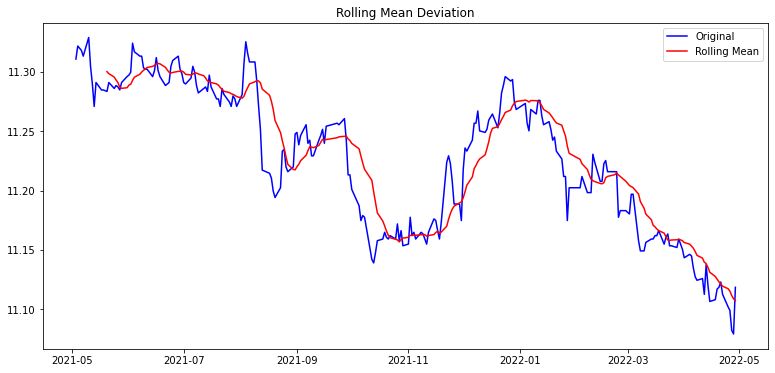

In [ ]:
plot_rolling_statistics_origmean(ts_log)

원본시계열, 이동평균을 plot으로 시각화한다.
<br/>시간 추이에 따라 최고가(High)의 평균은 낮아진다.

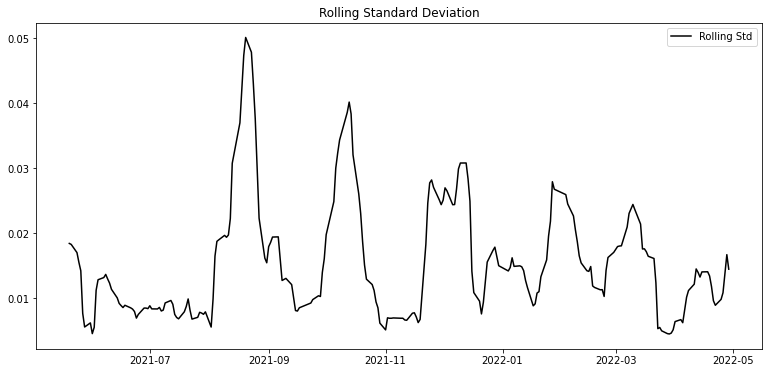

In [ ]:
plot_rolling_statistics_std(ts_log)

시간 추이에 따라 표준편차가 불규칙하다.

###Augmented Dicky-Fuller Test

In [ ]:
augmented_dickey_fuller_test(ts2_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.465842
p-value                          0.550336
#Lags Used                       1.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64


Samsung Electronics_High 시계열이 안정적이지 않다는 귀무가설을 검증한다.
<br/>p-value가 거의 0.5에 가깝게 나타난다.
<br/>귀무가설을 기각할 수 없기에 시계열이 안정적이라고 할 수 없다.

###추세 상쇄

p-value를 낮춰 시계열이 안정적이라는 대립가설을 받아들이기 위해 추세(Trend)를 상쇄한다. 

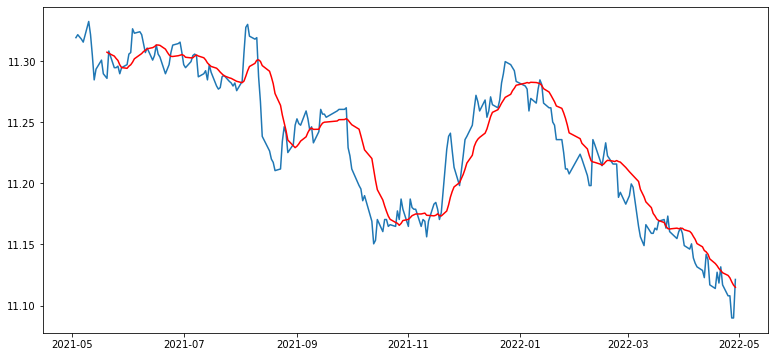

In [ ]:
high_moving_avg = ts2_log.rolling(window=12).mean()   
plt.plot(ts2_log)
plt.plot(high_moving_avg, color='red')
plt.show()

moving average 구하는 식을 통해 시간 추이에 따라 나타나는 평균값 변화를 추세(trend)를 구한다.

In [ ]:
ts_log_high_moving_avg = ts2_log - high_moving_avg 
ts_log_high_moving_avg.dropna(inplace=True) 
ts_log_high_moving_avg.head(15)

Date
2021-05-20   -0.021395
2021-05-21    0.001854
2021-05-24   -0.009485
2021-05-25   -0.007539
2021-05-26   -0.004656
2021-05-27   -0.007318
2021-05-28   -0.000081
2021-05-31    0.003022
2021-06-01    0.009908
2021-06-02    0.010004
2021-06-03    0.027333
2021-06-04    0.020946
2021-06-07    0.018975
2021-06-08    0.015439
2021-06-09    0.006507
Name: High, dtype: float64

ts2_log - high_moving_avg하여 변화량을 제거한다.

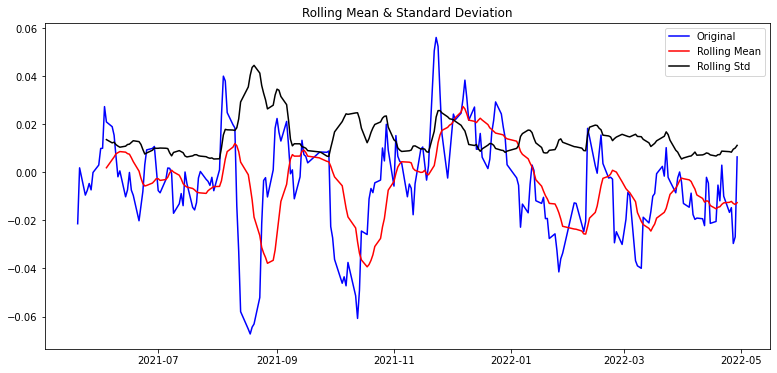

In [ ]:
plot_rolling_statistics(ts_log_high_moving_avg)

In [ ]:
augmented_dickey_fuller_test(ts_log_high_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -4.832944
p-value                          0.000047
#Lags Used                       1.000000
Number of Observations Used    232.000000
Critical Value (1%)             -3.458855
Critical Value (5%)             -2.874080
Critical Value (10%)            -2.573453
dtype: float64


p-value가 거의 0에 가깝게 나타난다.
<br/>귀무가설을 기각하여 시계열이 안정적이라고 할 수 있다.

###시계열 분해

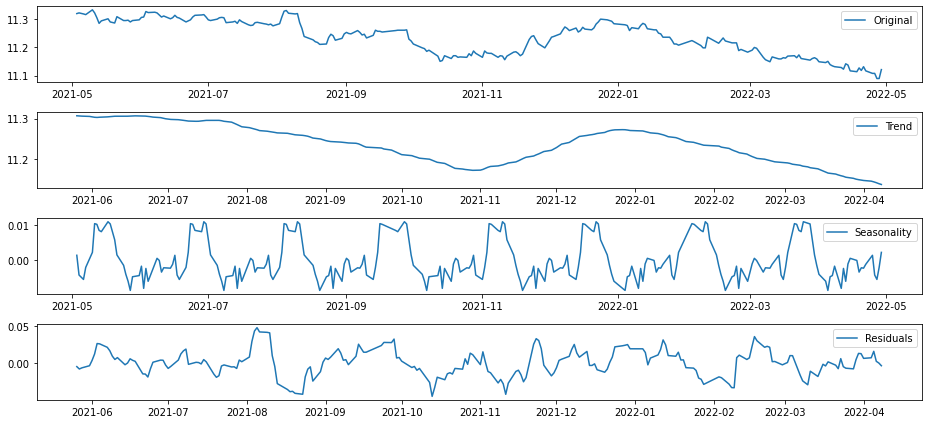

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

high_decomposition = seasonal_decompose(ts2_log, freq=30) 

high_trend = high_decomposition.trend 
high_seasonal = high_decomposition.seasonal 
high_residual = high_decomposition.resid


plt.subplot(411)
plt.plot(ts2_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(high_trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(high_seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(high_residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

freq을 30일로 정하여 월별 데이터로 구성한다.
<br/>trend는 추세(시간 추이에 따라 나타나는 평균값 변화),
<br/>seasonality은 계절성(패턴이 파악되지 않은 주기적 변화),

moving average 제거, differencing 등을 거치지 않고도 trend, seasonality으로 직접 분리한다.
<br/>Original 시계열에서 Trend와 Seasonality를 제거한 나머지를 Residual이라고 한다.

### Residual 안정성 확인

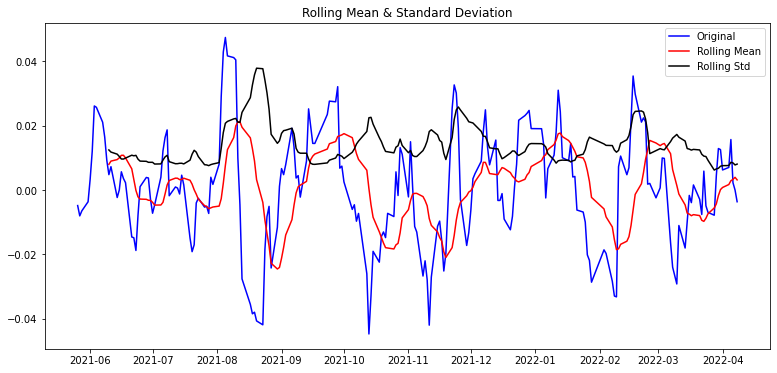

In [ ]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(high_residual)

In [ ]:
high_residual.dropna(inplace=True)
augmented_dickey_fuller_test(high_residual)

Results of Dickey-Fuller Test:
Test Statistic                -5.962990e+00
p-value                        2.018328e-07
#Lags Used                     5.000000e+00
Number of Observations Used    2.090000e+02
Critical Value (1%)           -3.462032e+00
Critical Value (5%)           -2.875471e+00
Critical Value (10%)          -2.574195e+00
dtype: float64


p-value가 거의 0에 가깝게 나타난다.
<br/>귀무가설을 기각하여 시계열이 안정적이라고 할 수 있다.

##데이터 분리

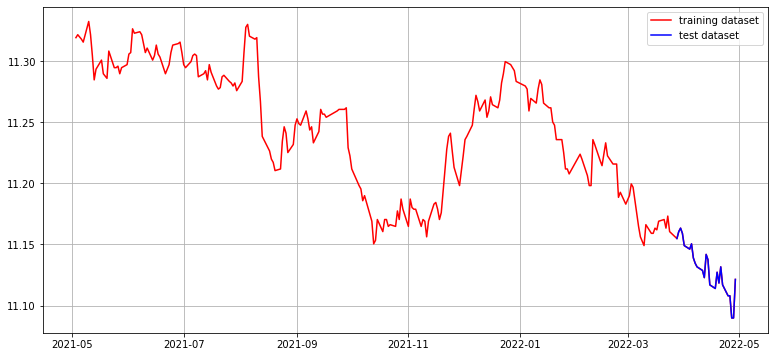

In [ ]:
train_data, test_data = ts2_log[:int(len(ts2_log)*0.9)], ts2_log[int(len(ts2_log)*0.9):]

plt.figure(figsize=(13,6))
plt.grid(True)
plt.plot(ts2_log, c='r', label='training dataset')
plt.plot(test_data, c='b', label='test dataset')
plt.legend()
plt.show()

과거 데이터를 기반으로 한 시계열 예측이기 때문에 데이터를 훈련 데이터와 시험 데이터로 분리한다.
<br/>train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts2_log를 선택한다.

In [ ]:
print(train_data.shape)
print(test_data.shape)

(220,)
(25,)


##모델 구성

###ACF. PACF

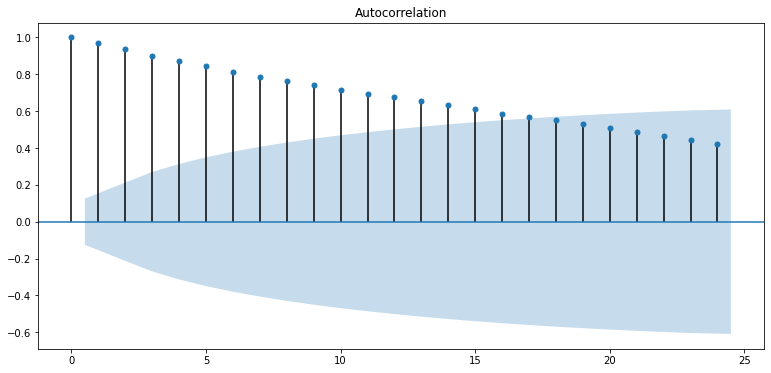

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts2_log)
plt.show()

ACF(Autocorrelation) 그래프를 볼 때
<br/>점차적으로 감소하는 추이를 보이고 있어 적합한 q값이 없어 보인다.

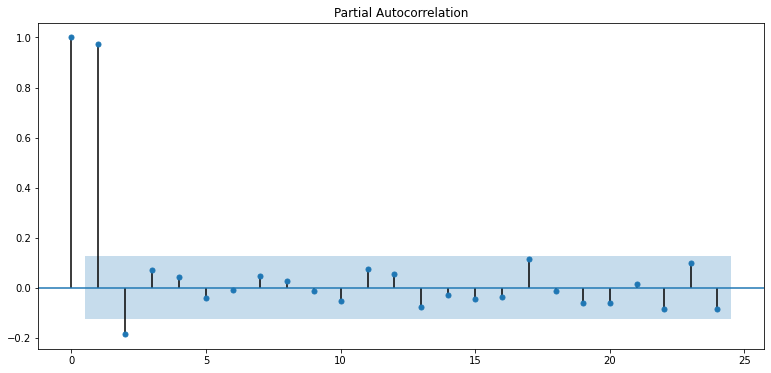

In [ ]:
plot_pacf(ts2_log)  
plt.show()

PACF(Partial Autocorrelation) 그래프를 볼 때 p=0이 적합해 보인다.
<br/>p=1 이상인 구간에서 PACF가 0에 가까워지고 있기 때문이다.

###차분 안정성 확인

Results of Dickey-Fuller Test:
Test Statistic                -1.367441e+01
p-value                        1.439337e-25
#Lags Used                     0.000000e+00
Number of Observations Used    2.430000e+02
Critical Value (1%)           -3.457551e+00
Critical Value (5%)           -2.873509e+00
Critical Value (10%)          -2.573148e+00
dtype: float64



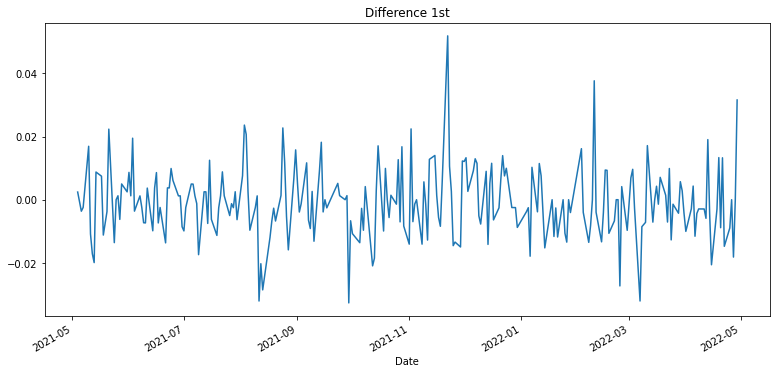

In [ ]:
high_diff_1 = ts2_log.diff(periods=1).iloc[1:]
high_diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(high_diff_1)
print()

p-value가 0.5이하이므로 1차 차분한 시계열 데이터 값이 안정적이다.

Results of Dickey-Fuller Test:
Test Statistic                -7.915715e+00
p-value                        3.841222e-12
#Lags Used                     1.200000e+01
Number of Observations Used    2.300000e+02
Critical Value (1%)           -3.459106e+00
Critical Value (5%)           -2.874190e+00
Critical Value (10%)          -2.573512e+00
dtype: float64



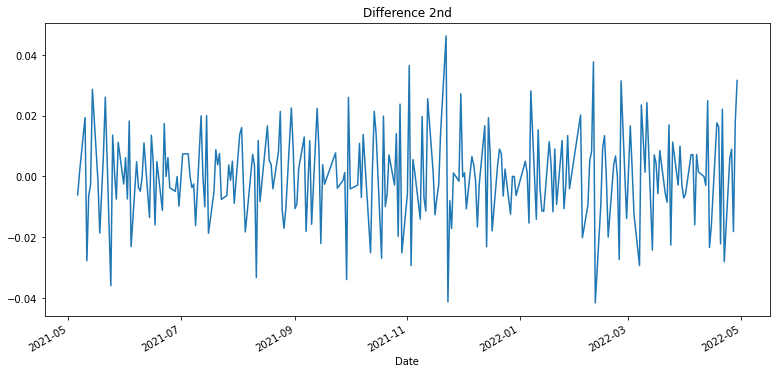

In [ ]:
high_diff_2 = high_diff_1.diff(periods=1).iloc[1:]
high_diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(high_diff_2)
print()

p-value가 0.5이하이므로 2차 차분한 시계열 데이터 값이 안정적이다.
<br/>1차 차분한 것이 데이터 손실이 더 적기 때문에 d=1이 적합하다.

##모델 학습

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_data, order=(0, 1, 0))  
fitted_m = model.fit(disp=-1)  

print(fitted_m.summary())
print()

                             ARIMA Model Results                              
Dep. Variable:                 D.High   No. Observations:                  219
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 673.299
Method:                           css   S.D. of innovations              0.011
Date:                Sun, 17 Jul 2022   AIC                          -1342.597
Time:                        04:59:59   BIC                          -1335.819
Sample:                             1   HQIC                         -1339.860
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.001     -0.968      0.334      -0.002       0.001



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<br/>



```
train_data.index = pd.DatetimeIndex(train_data.index).to_period('D')
```



ValueWarning을 해결하기 위해 데이터의 인덱스에 to_period('D')를 시도했으나 해결되지 않는다.

<br/>

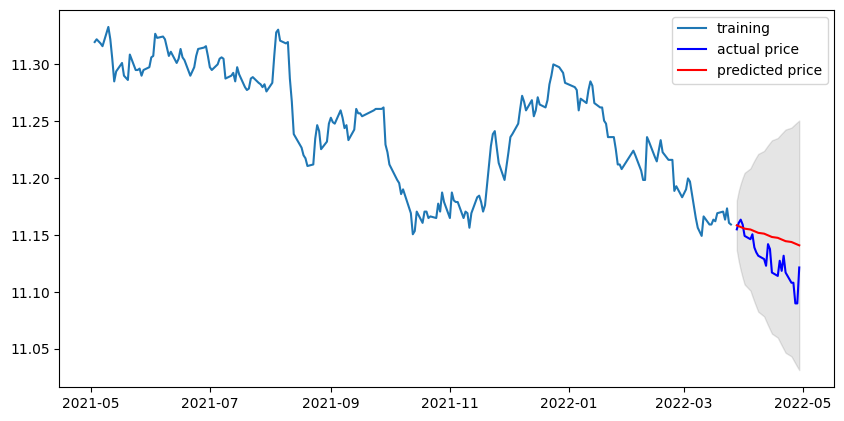

In [ ]:
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  

fc_series = pd.Series(fc, index=test_data.index)   
lower_series = pd.Series(conf[:, 0], index=test_data.index)  
upper_series = pd.Series(conf[:, 1], index=test_data.index)  

plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')

plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

forecast() 메소드를 이용해 시험 데이터를 예측한다.
<br/> alpha=0.05은 95% 신뢰구간을 설정한다.
<br/>fc_series은 예측 결과, lower_series는 예측결과의 하한, upper_series는 상한을 나타낸다.

##모델 평가

In [ ]:
mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE :', round(mape, 4))

MAPE : 0.0204


시계열 데이터를 로그 변환하여 사용했으므로 지수 변환한다.
<br/>np.exp()를 통해 전부 원본 스케일로 돌린 후 MAPE를 계산한다.

#결론

시계열 데이터의 원리는 단순하다.
<br/>과거의 일은 반복된다.
<br/>패턴을 측정할 수 있고 미래를 예측할 수 있다.

그런데 데이터가 아무리 많더라고 하도
<br/>시계열 데이터가 다루는 주제에 따라 예측력이 다르지 않을까?
<br/>주식은 인간의 심리가 반영되는 불확실한 패턴에 가깝고
<br/>행성의 운동은 물리법칙에 따른 규칙적인 패턴에 가깝다.
<br/>시계열 데이터가 경제, 사회, 과학, 환경 등 어느 주제를 분석하냐에 따라서
<br/>예측력을 발휘하는 정도가 다를 것이다.

#참고문헌

**LMS**
<br/>[onedang22](https://github.com/wonchul-kim)

<br/>**공식 사이트**
<br/>Yahoo Finance
<br/>[Samsung Electronics Co., Ltd. (005930.KS)](https://finance.yahoo.com/quote/005930.KS/history?p=005930.KS)

<br/>**웹사이트**
<br/>[ARIMA Model for Time Series Forecasting](https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting/notebook)
<br/>[FutureWarning: pandas.util.testing is deprecated. #104](https://bytemeta.vip/repo/JPCERTCC/LogonTracer/issues/104)
<br/>[Ordering Timestamps for ARIMA model predicion](https://stackoverflow.com/questions/62098301/ordering-timestamps-for-arima-model-predicion)

